In [1]:
import string
from collections import Counter

import matplotlib.pyplot as plt

In [2]:

def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#KaranJohar') \
        .setSince("2020-06-20") \
        .setUntil("2020-06-30") \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [3]:

# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [4]:
# Print texts
text_tweets

[["I don't know if Sonam and Karan stand anywhere in front of SSR. They are just Amir Zaahil. And, Sonam has another definition of hot, u can see her husband's pic. Sushant's Fudge is btr. #SushantInOurHeartsForever #CBIEnquiryForSSR #SonamKapoor #KaranJohar https://www.facebook.com/100009287050330/posts/2707320716254137/?extid=A85FpdbCaDQu47os&amp;d=t&amp;vh=i"],
 ['Have you shared your #ArtOfMotorcycling yet? Don’t worry, you can still share it till 10th September. The prize? A chance to have your art featured on official #RoyalEnfield merchandise or even win an internship with their design team. Visit https://bit.ly/3lzVFmc #REApparel'],
 ["@Simi_Garewal i admire your point of view against current indian government and trump but i also wonder why you never tweet about how #Bollywood's top production houses treat certain actors and actresses.. you too scarred to say anything against #KaranJohar and #YRF??"],
 ["I'm with you... And whole world is with you.. To boycott #karanjohar the 

In [5]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [6]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' angry': 2, ' happy': 2, ' fearless': 1, ' singled out': 1, ' fearful': 1, ' adequate': 1})


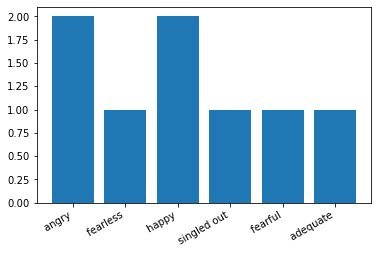

In [7]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

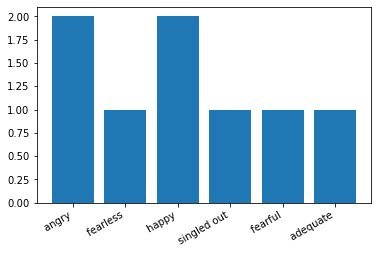

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()